<a href="https://colab.research.google.com/github/Ikhsanachmad/Predict-Space-Titanic/blob/main/Space_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [284]:
import pandas as pd
import numpy as np

In [285]:
!dir

sample_data  test.csv  train.csv


In [286]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [287]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [371]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
train.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
train.shape

(8693, 14)

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [141]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train.isnull().sum()  # cek data null

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# Visualisasi Data

## Simple Barchart

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

In [289]:
train["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [290]:
count_trans = train['Transported'].value_counts()



Text(0.5, 1.0, 'Distribusi Penumpang')

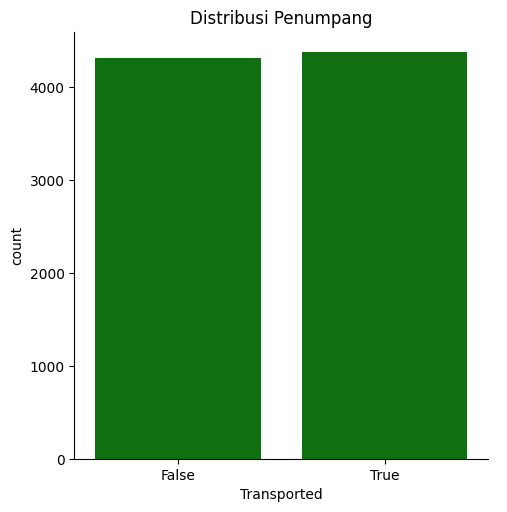

In [291]:
trans_data = sns.catplot(x = "Transported", data = train, kind = "count", color = "g")
plt.title("Distribusi Penumpang")

In [292]:
def barchart(column) :
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10, 5))
  plt.bar(index , values, color = "green", width = 0.7)

  plt.show()


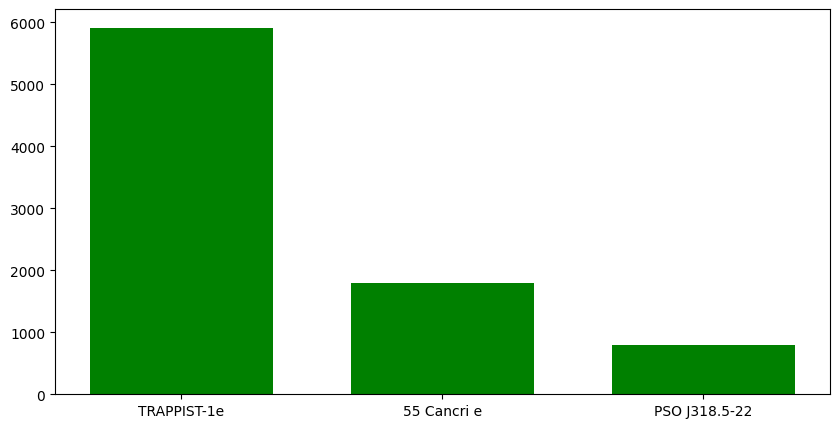

In [293]:
barchart("Destination")

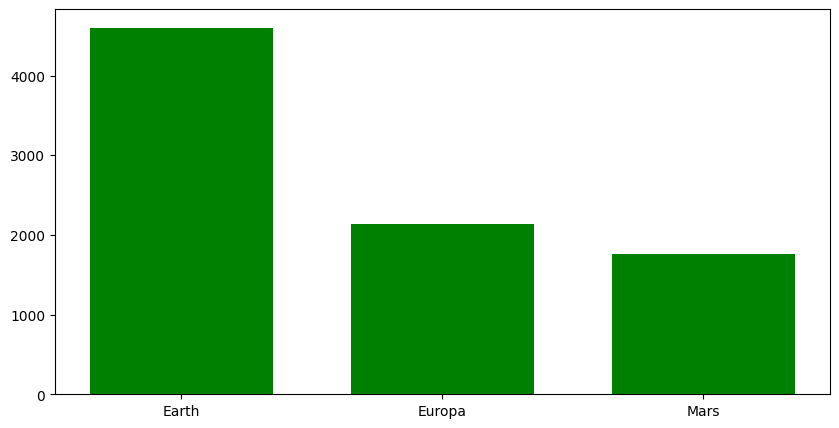

In [294]:
barchart("HomePlanet")

## Group Barchart

In [295]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [296]:
transported = train.groupby(['HomePlanet', "Transported"]).count()['PassengerId'].reset_index()

In [297]:
transported

,HomePlanet,Transported,PassengerId
0,Earth,False,2651
1,Earth,True,1951
2,Europa,False,727
3,Europa,True,1404
4,Mars,False,839
5,Mars,True,920


In [298]:
def group_barchart(column) :
  transported = train.groupby(['Transported', column]).count()['PassengerId'].reset_index()

  g = sns.catplot(
      data = transported, kind = "bar",
      x = "Transported", y = "PassengerId" , hue = column,
      palette="dark", height=5
  )

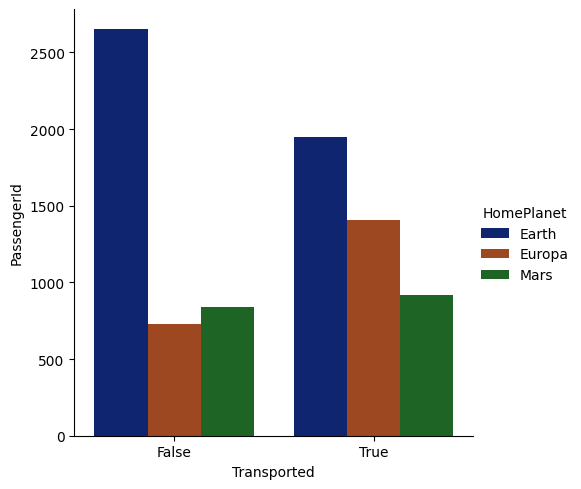

In [299]:
group_barchart("HomePlanet")

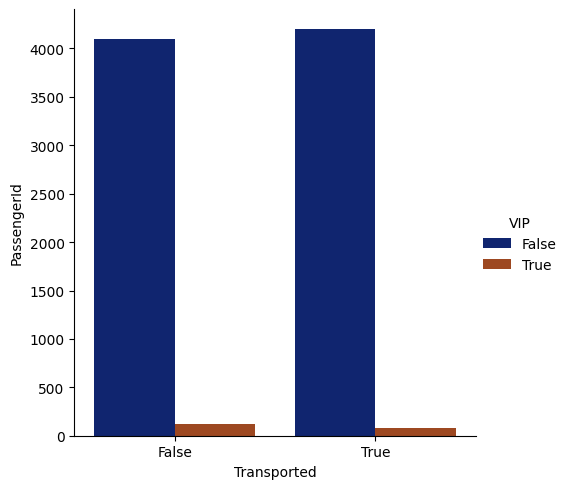

In [300]:
group_barchart("VIP")

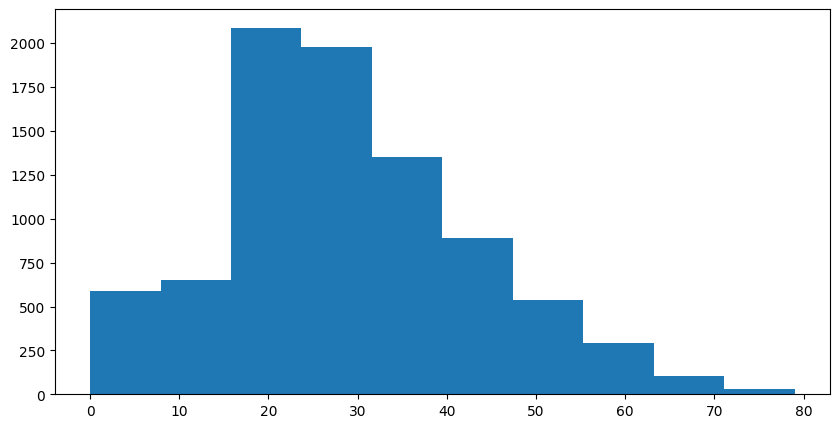

In [301]:
fig , ax = plt.subplots(figsize = (10, 5))
ax.hist(train.Age)

plt.show()

## KDE Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


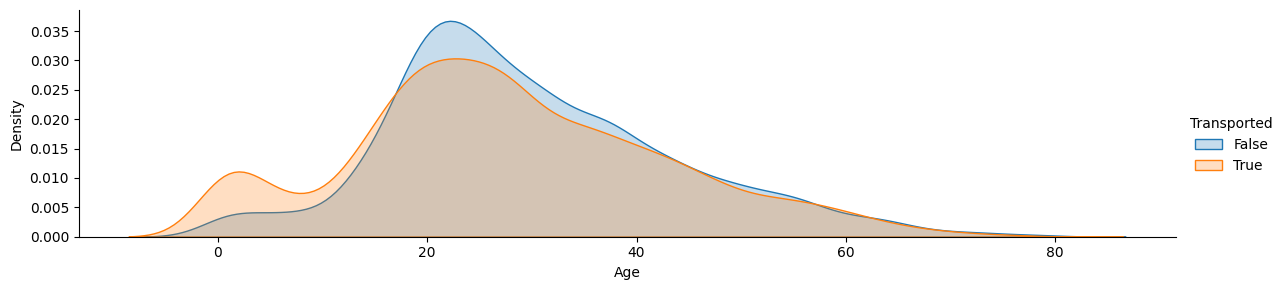

In [302]:
facet = sns.FacetGrid(train , hue = "Transported", aspect = 4)
facet.map(sns.kdeplot , "Age", shade = True)
facet.add_legend()
plt.show()

# Processing Data

In [303]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [304]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [305]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [306]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## Missing Categorical Dat

### Mising value Train

In [307]:
train[train['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [308]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [309]:
modus_homeplanet = train['HomePlanet'].mode()[0]
modus_homeplanet

'Earth'

In [310]:
train['HomePlanet'] = train['HomePlanet'].fillna(modus_homeplanet)

In [311]:
train[train['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [312]:
train[train['HomePlanet'].index == 113]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
113,0119_01,Earth,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False


In [313]:
train['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [314]:
modus_cryosleep = train['CryoSleep'].mode()[0]
modus_cryosleep

False

In [315]:
train['CryoSleep'] = train['CryoSleep'].fillna(modus_cryosleep)

In [316]:
train[train['CryoSleep'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [317]:
train[train['Cabin'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,False
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,False
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,True
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False


In [318]:
train['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [319]:
modus_cabin = train['Cabin'].mode()[0]
modus_cabin

train['Cabin'] = train['Cabin'].fillna(modus_cabin)

In [320]:
train[train['Cabin'].index == 103]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
103,0110_01,Europa,False,G/734/S,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False


In [321]:
train[train['Destination'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
47,0045_02,Mars,True,F/10/P,NaN,19.0,False,0.0,0.0,0.0,0.0,0.0,Mass Chmad,True
128,0138_02,Earth,False,E/5/P,NaN,34.0,False,0.0,22.0,0.0,564.0,207.0,Monah Gambs,False
139,0152_01,Earth,False,F/32/P,NaN,41.0,False,0.0,0.0,0.0,0.0,607.0,Andan Estron,False
347,0382_01,Earth,False,G/64/P,NaN,23.0,False,348.0,0.0,0.0,4.0,368.0,Blanie Floydendley,False
430,0462_01,Earth,True,G/67/S,NaN,50.0,False,0.0,0.0,0.0,0.0,0.0,Ronia Sosanturney,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,8956_02,Earth,True,G/1453/P,NaN,20.0,False,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,True
8551,9130_01,Mars,True,F/1765/S,NaN,41.0,False,0.0,0.0,0.0,0.0,0.0,Blers Corte,True
8616,9195_02,Mars,True,F/1779/S,NaN,33.0,False,0.0,0.0,0.0,0.0,0.0,Ceros Purle,True
8621,9197_02,Europa,False,C/308/P,NaN,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False


In [322]:
train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [323]:
modus_destination = train['Destination'].mode()[0]
modus_destination

'TRAPPIST-1e'

In [324]:
train['Destination'] = train['Destination'].fillna(modus_destination)

In [325]:
train[train['Destination'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [326]:
train[train['Destination'].index == 47]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
47,0045_02,Mars,True,F/10/P,TRAPPIST-1e,19.0,False,0.0,0.0,0.0,0.0,0.0,Mass Chmad,True


In [327]:
train[train['VIP'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
145,0165_01,Mars,True,F/37/P,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,0.0,0.0,Graven Anche,True
228,0244_02,Mars,True,F/47/S,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,Tous Sad,True
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie Trerady,True
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,False
8542,9122_01,Earth,True,G/1469/S,55 Cancri e,55.0,NaN,0.0,0.0,0.0,0.0,0.0,Paulas Schmondez,False
8630,9205_03,Europa,True,B/300/P,TRAPPIST-1e,52.0,NaN,0.0,0.0,0.0,0.0,0.0,Propent Brakeng,True


In [328]:
train['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [329]:
modus_vip = train['VIP'].mode()[0]
modus_vip

train['VIP'] = train['VIP'].fillna(modus_vip)

In [330]:
train[train['VIP'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


### Mising Value Test

In [331]:
test[test['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
276,0616_01,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,NaN,1154.0,1025.0,Arkaban Spriney
340,0730_01,NaN,False,F/135/S,TRAPPIST-1e,44.0,False,14.0,0.0,1817.0,2.0,171.0,Skunch Ponie
450,0936_01,NaN,False,F/171/S,TRAPPIST-1e,20.0,False,0.0,4.0,0.0,732.0,1.0,Anniey Currisones
464,0967_01,NaN,False,F/180/S,TRAPPIST-1e,19.0,False,1.0,0.0,0.0,0.0,632.0,Andan Fryan
481,1021_01,NaN,False,F/192/S,TRAPPIST-1e,23.0,False,0.0,458.0,151.0,256.0,0.0,Mara Ments
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,8621_01,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,Vanley Simmonders
3980,8678_01,NaN,True,G/1399/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Eilan Kellson
4032,8775_01,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Raston Maltorted
4159,9025_01,NaN,False,G/1454/S,TRAPPIST-1e,42.0,False,0.0,0.0,28.0,726.0,0.0,Ale Whitersone


In [332]:
test['HomePlanet'].value_counts()

HomePlanet
Earth     2263
Europa    1002
Mars       925
Name: count, dtype: int64

In [333]:
modus_homeplanet_test = test['HomePlanet'].mode()[0]
modus_homeplanet_test

'Earth'

In [334]:
test['HomePlanet'] = test['HomePlanet'].fillna(modus_homeplanet_test)

In [335]:
test[test['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name


In [336]:
test[test['CryoSleep'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
68,0156_01,Mars,NaN,F/34/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Tures Upead
78,0175_02,Earth,NaN,G/25/P,55 Cancri e,8.0,False,0.0,0.0,0.0,0.0,0.0,Elody Benney
92,0208_01,Earth,NaN,G/33/P,TRAPPIST-1e,40.0,False,44.0,0.0,565.0,0.0,18.0,Mael Vales
99,0227_01,Earth,NaN,NaN,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Buckentry
165,0349_01,Europa,NaN,A/4/S,TRAPPIST-1e,33.0,False,0.0,1030.0,0.0,3490.0,5832.0,Meropus Ametic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8705_01,Mars,NaN,F/1790/P,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,Anch Gen
4108,8925_06,Europa,NaN,C/295/P,TRAPPIST-1e,27.0,False,0.0,2182.0,7.0,2582.0,19.0,Zedarga Pabler
4209,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic
4230,9182_01,Earth,NaN,F/1776/S,TRAPPIST-1e,14.0,False,0.0,0.0,NaN,1377.0,29.0,Garyan Gainebergan


In [337]:
test['CryoSleep'].value_counts()

CryoSleep
False    2640
True     1544
Name: count, dtype: int64

In [338]:
modus_cryosleep_test = test['CryoSleep'].mode()[0]
modus_cryosleep_test

False

In [339]:
test['CryoSleep'] = test['CryoSleep'].fillna(modus_cryosleep_test)

test[test['CryoSleep'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name


In [340]:
modus_cabin_test = test['Cabin'].mode()[0]
modus_cabin_test

'G/160/P'

In [341]:
test['Cabin'] = test['Cabin'].fillna(modus_cabin_test)

In [342]:
test[test['Cabin'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name


In [343]:
test['Destination'].value_counts()

Destination
TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: count, dtype: int64

In [344]:
modus_destination_test = test['Destination'].mode()[0]
modus_destination_test

'TRAPPIST-1e'

In [345]:
test['Destination'] = test['Destination'].fillna(modus_destination_test)

In [346]:
test[test['Destination'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name


In [347]:
test['VIP'].value_counts()

VIP
False    4110
True       74
Name: count, dtype: int64

In [348]:
modus_vip_test = test['VIP'].mode()[0]
modus_vip_test

test['VIP'] = test['VIP'].fillna(modus_vip_test)

In [349]:
test[test['VIP'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name


## Mising Data Age (Numeric)

In [350]:
mean_age = train['Age'].mean()
mean_age

28.82793046746535

In [351]:
train['Age'] = train['Age'].fillna(mean_age)

In [352]:
mean_age_test = test['Age'].mean()
mean_age_test

28.65814620162446

In [353]:
test['Age'] = test['Age'].fillna(mean_age_test)

In [354]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Drop Data

In [355]:
train = train.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis = 1)
test = test.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis = 1)

In [356]:
train.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64

In [357]:
test.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
dtype: int64

# Convert Numeric

In [358]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True


In [359]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False


## Convert Data

In [360]:
transported_mapping = {False : 0, True : 1 }

train['Transported'] = train['Transported'].map(transported_mapping)

In [361]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1


In [362]:
## Convert data Destination
destination_mapping = {"TRAPPIST-1e" : 0, "55 Cancri e" : 1, "PSO J318.5-22" :2 }

train['Destination'] = train['Destination'].map(destination_mapping)
test['Destination'] = test['Destination'].map(destination_mapping)

## Convert data VIP
vip_mapping = {False : 0, True : 1}

train['VIP'] = train['VIP'].map(vip_mapping)
test['VIP'] = test['VIP'].map(vip_mapping)

## Convert data Cyrosleep
cryosleep_mapping = {False : 0, True : 1}

train['CryoSleep'] = train['CryoSleep'].map(cryosleep_mapping)
test['CryoSleep'] = test['CryoSleep'].map(cryosleep_mapping)

In [363]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0001_01,Europa,0,B/0/P,0,39.0,0,0
1,0002_01,Earth,0,F/0/S,0,24.0,0,1
2,0003_01,Europa,0,A/0/S,0,58.0,1,0
3,0003_02,Europa,0,A/0/S,0,33.0,0,0
4,0004_01,Earth,0,F/1/S,0,16.0,0,1


In [364]:
## Covert data train sub categorical HomePlanet
homeplanet = train[['HomePlanet']]
dummies = pd.get_dummies(homeplanet, dtype=int)

train = pd.merge(train.reset_index(), dummies.reset_index()) ## Merger data dummies

In [365]:
## Drop coloumn yang tidak digunakan
train = train.drop(["index",'HomePlanet'], axis =1 )

In [366]:
train.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,0,B/0/P,0,39.0,0,0,0,1,0
1,0002_01,0,F/0/S,0,24.0,0,1,1,0,0
2,0003_01,0,A/0/S,0,58.0,1,0,0,1,0
3,0003_02,0,A/0/S,0,33.0,0,0,0,1,0
4,0004_01,0,F/1/S,0,16.0,0,1,1,0,0


In [367]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,0013_01,Earth,1,G/3/S,0,27.0,0
1,0018_01,Earth,0,F/4/S,0,19.0,0
2,0019_01,Europa,1,C/0/S,1,31.0,0
3,0021_01,Europa,0,C/1/S,0,38.0,0
4,0023_01,Earth,0,F/5/S,0,20.0,0


In [368]:
## Covert data test sub categorical HomePlanet
homeplanet = test[['HomePlanet']]
dummies = pd.get_dummies(homeplanet, dtype=int)

test = pd.merge(test.reset_index(), dummies.reset_index())

In [369]:
test.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,0013_01,Earth,1,G/3/S,0,27.0,0,1,0,0
1,1,0018_01,Earth,0,F/4/S,0,19.0,0,1,0,0
2,2,0019_01,Europa,1,C/0/S,1,31.0,0,0,1,0
3,3,0021_01,Europa,0,C/1/S,0,38.0,0,0,1,0
4,4,0023_01,Earth,0,F/5/S,0,20.0,0,1,0,0


In [370]:
## Drop coloumn yang tidak digunakan
test = test.drop(["index",'HomePlanet'], axis =1 )

In [371]:
test.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0013_01,1,G/3/S,0,27.0,0,1,0,0
1,0018_01,0,F/4/S,0,19.0,0,1,0,0
2,0019_01,1,C/0/S,1,31.0,0,0,1,0
3,0021_01,0,C/1/S,0,38.0,0,0,1,0
4,0023_01,0,F/5/S,0,20.0,0,1,0,0


In [373]:
train.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,0,B/0/P,0,39.0,0,0,0,1,0
1,0002_01,0,F/0/S,0,24.0,0,1,1,0,0
2,0003_01,0,A/0/S,0,58.0,1,0,0,1,0
3,0003_02,0,A/0/S,0,33.0,0,0,0,1,0
4,0004_01,0,F/1/S,0,16.0,0,1,1,0,0


## Extract Data

### Extract passengerId

In [374]:
train['PassengerGroup'] = train['PassengerId'].str.extract('(^\d*)', expand = False)

In [280]:
train.head()

,CryoSleep,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,0,0,39.0,0,0,0,1,0,0001,1,1,0
1,0,0,24.0,0,1,1,0,0,0002,6,1,1
2,0,0,58.0,1,0,0,1,0,0003,0,1,1
3,0,0,33.0,0,0,0,1,0,0003,0,1,1
4,0,0,16.0,0,1,1,0,0,0004,6,1,1


In [375]:
test['PassengerGroup'] = test['PassengerId'].str.extract('(^\d*)', expand = False)

In [281]:
test.head()

,CryoSleep,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,1,0,27.0,0,1,0,0,0013,7,1,1
1,0,0,19.0,0,1,0,0,0018,6,1,1
2,1,1,31.0,0,0,1,0,0019,2,1,1
3,0,0,38.0,0,0,1,0,0021,2,1,1
4,0,0,20.0,0,1,0,0,0023,6,1,1


In [376]:
train = train.drop(["PassengerId"], axis = 1)
test = test.drop(["PassengerId"], axis = 1)

In [377]:
train.head()

,CryoSleep,Cabin,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup
0,0,B/0/P,0,39.0,0,0,0,1,0,0001
1,0,F/0/S,0,24.0,0,1,1,0,0,0002
2,0,A/0/S,0,58.0,1,0,0,1,0,0003
3,0,A/0/S,0,33.0,0,0,0,1,0,0003
4,0,F/1/S,0,16.0,0,1,1,0,0,0004


In [378]:
test.head()

,CryoSleep,Cabin,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup
0,1,G/3/S,0,27.0,0,1,0,0,0013
1,0,F/4/S,0,19.0,0,1,0,0,0018
2,1,C/0/S,1,31.0,0,0,1,0,0019
3,0,C/1/S,0,38.0,0,0,1,0,0021
4,0,F/5/S,0,20.0,0,1,0,0,0023


### Extract Cabin

In [379]:
train['CabinDeck'] = train['Cabin'].str.split('/', expand = True)[0]

In [380]:
train.head()

,CryoSleep,Cabin,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck
0,0,B/0/P,0,39.0,0,0,0,1,0,0001,B
1,0,F/0/S,0,24.0,0,1,1,0,0,0002,F
2,0,A/0/S,0,58.0,1,0,0,1,0,0003,A
3,0,A/0/S,0,33.0,0,0,0,1,0,0003,A
4,0,F/1/S,0,16.0,0,1,1,0,0,0004,F


In [381]:
train['DeckPosition'] = train['Cabin'].apply(lambda deck: "Lower" if deck in ('A', 'B', 'C', 'D') else "Higher" )

In [382]:
train.tail()

,CryoSleep,Cabin,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition
8688,0,A/98/P,1,41.0,1,0,0,1,0,9276,A,Higher
8689,1,G/1499/S,2,18.0,0,0,1,0,0,9278,G,Higher
8690,0,G/1500/S,0,26.0,0,1,1,0,0,9279,G,Higher
8691,0,E/608/S,1,32.0,0,0,0,1,0,9280,E,Higher
8692,0,E/608/S,0,44.0,0,1,0,1,0,9280,E,Higher


In [383]:
train["CabinSide"] = train["Cabin"].str.split('/', expand = True)[2]

In [384]:
train.tail()

,CryoSleep,Cabin,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
8688,0,A/98/P,1,41.0,1,0,0,1,0,9276,A,Higher,P
8689,1,G/1499/S,2,18.0,0,0,1,0,0,9278,G,Higher,S
8690,0,G/1500/S,0,26.0,0,1,1,0,0,9279,G,Higher,S
8691,0,E/608/S,1,32.0,0,0,0,1,0,9280,E,Higher,S
8692,0,E/608/S,0,44.0,0,1,0,1,0,9280,E,Higher,S


In [385]:
test['CabinDeck'] = test['Cabin'].str.split('/', expand = True)[0]

In [386]:
test.tail()

,CryoSleep,Cabin,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck
4272,1,G/1496/S,0,34.000000,0,1,0,0,9266,G
4273,0,G/160/P,0,42.000000,0,1,0,0,9269,G
4274,1,D/296/P,1,28.658146,0,0,0,1,9271,D
4275,0,D/297/P,0,28.658146,0,0,1,0,9273,D
4276,1,G/1498/S,2,43.000000,0,1,0,0,9277,G


In [387]:
test['DeckPosition'] = test['Cabin'].apply(lambda deck: "Lower" if deck in ('A', 'B', 'C', 'D') else "Higher" )

In [388]:
test.head()

,CryoSleep,Cabin,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition
0,1,G/3/S,0,27.0,0,1,0,0,0013,G,Higher
1,0,F/4/S,0,19.0,0,1,0,0,0018,F,Higher
2,1,C/0/S,1,31.0,0,0,1,0,0019,C,Higher
3,0,C/1/S,0,38.0,0,0,1,0,0021,C,Higher
4,0,F/5/S,0,20.0,0,1,0,0,0023,F,Higher


In [389]:
test["CabinSide"] = test["Cabin"].str.split('/', expand = True)[2]

In [390]:
test.head()

,CryoSleep,Cabin,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,1,G/3/S,0,27.0,0,1,0,0,0013,G,Higher,S
1,0,F/4/S,0,19.0,0,1,0,0,0018,F,Higher,S
2,1,C/0/S,1,31.0,0,0,1,0,0019,C,Higher,S
3,0,C/1/S,0,38.0,0,0,1,0,0021,C,Higher,S
4,0,F/5/S,0,20.0,0,1,0,0,0023,F,Higher,S


In [391]:
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1)

In [392]:
deck_mapping = {"A": 0, "B": 1, "C": 2,
                 "D": 4, "E": 5, "F": 6, "G": 7, "T": 7}

train['CabinDeck'] = train['CabinDeck'].map(deck_mapping)

In [393]:
train.head()

,CryoSleep,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,0,0,39.0,0,0,0,1,0,0001,1,Higher,P
1,0,0,24.0,0,1,1,0,0,0002,6,Higher,S
2,0,0,58.0,1,0,0,1,0,0003,0,Higher,S
3,0,0,33.0,0,0,0,1,0,0003,0,Higher,S
4,0,0,16.0,0,1,1,0,0,0004,6,Higher,S


In [394]:
position_mapping = {"Lower": 0, "Higher": 1,}

train['DeckPosition'] = train['DeckPosition'].map(position_mapping)

In [395]:
train.head()

,CryoSleep,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,0,0,39.0,0,0,0,1,0,0001,1,1,P
1,0,0,24.0,0,1,1,0,0,0002,6,1,S
2,0,0,58.0,1,0,0,1,0,0003,0,1,S
3,0,0,33.0,0,0,0,1,0,0003,0,1,S
4,0,0,16.0,0,1,1,0,0,0004,6,1,S


In [396]:
side_mapping = {"P": 0, "S": 1,}

train['CabinSide'] = train['CabinSide'].map(side_mapping)

In [397]:
train.head()

,CryoSleep,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,0,0,39.0,0,0,0,1,0,0001,1,1,0
1,0,0,24.0,0,1,1,0,0,0002,6,1,1
2,0,0,58.0,1,0,0,1,0,0003,0,1,1
3,0,0,33.0,0,0,0,1,0,0003,0,1,1
4,0,0,16.0,0,1,1,0,0,0004,6,1,1


In [398]:
deck_mapping_test = {"A": 0, "B": 1, "C": 2,
                 "D": 4, "E": 5, "F": 6, "G": 7, "T": 7}

test['CabinDeck'] = test['CabinDeck'].map(deck_mapping_test)

In [399]:
test.head()

,CryoSleep,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,1,0,27.0,0,1,0,0,0013,7,Higher,S
1,0,0,19.0,0,1,0,0,0018,6,Higher,S
2,1,1,31.0,0,0,1,0,0019,2,Higher,S
3,0,0,38.0,0,0,1,0,0021,2,Higher,S
4,0,0,20.0,0,1,0,0,0023,6,Higher,S


In [400]:
position_mapping_test = {"Lower": 0, "Higher": 1,}

test['DeckPosition'] = test['DeckPosition'].map(position_mapping_test)

In [401]:
test.head()

,CryoSleep,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,1,0,27.0,0,1,0,0,0013,7,1,S
1,0,0,19.0,0,1,0,0,0018,6,1,S
2,1,1,31.0,0,0,1,0,0019,2,1,S
3,0,0,38.0,0,0,1,0,0021,2,1,S
4,0,0,20.0,0,1,0,0,0023,6,1,S


In [402]:
side_mapping_test = {"P": 0, "S": 1,}

test['CabinSide'] = test['CabinSide'].map(side_mapping_test)

# Modelling

In [403]:
train.shape, test.shape

((8693, 12), (4277, 11))

In [404]:
train.head()

,CryoSleep,Destination,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,0,0,39.0,0,0,0,1,0,0001,1,1,0
1,0,0,24.0,0,1,1,0,0,0002,6,1,1
2,0,0,58.0,1,0,0,1,0,0003,0,1,1
3,0,0,33.0,0,0,0,1,0,0003,0,1,1
4,0,0,16.0,0,1,1,0,0,0004,6,1,1


In [405]:
test.head()

,CryoSleep,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,1,0,27.0,0,1,0,0,0013,7,1,1
1,0,0,19.0,0,1,0,0,0018,6,1,1
2,1,1,31.0,0,0,1,0,0019,2,1,1
3,0,0,38.0,0,0,1,0,0021,2,1,1
4,0,0,20.0,0,1,0,0,0023,6,1,1


In [406]:
  # Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [407]:
train_data = train.drop("Transported",axis = 1 )
target = train['Transported']

In [408]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=1)

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.69177688 0.67797585 0.69292697 0.70425777 0.70598389]


In [409]:
score.mean()

0.6945842716109347

In [410]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=1)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.67165037 0.67625072 0.64979873 0.68009206 0.66052934]


In [411]:
score.mean()

0.6676642462799209

In [412]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=1)

clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.71075331 0.70500288 0.706728   0.71634062 0.72554661]


In [414]:
score.mean()

0.7128742826022654

## Predicsion

In [415]:
test.head()

,CryoSleep,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide
0,1,0,27.0,0,1,0,0,0013,7,1,1
1,0,0,19.0,0,1,0,0,0018,6,1,1
2,1,1,31.0,0,0,1,0,0019,2,1,1
3,0,0,38.0,0,0,1,0,0021,2,1,1
4,0,0,20.0,0,1,0,0,0023,6,1,1


In [416]:
clf = RandomForestClassifier()
clf.fit(train_data, target)

RandomForestClassifier()

In [417]:
prediction = clf.predict(test)

In [421]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Transported": prediction
    })

In [422]:
submission.to_csv("sample_submission.csv", index = False)

In [424]:
test['Transported'] = submission['Transported']
test.tail()

,CryoSleep,Destination,Age,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,PassengerGroup,CabinDeck,DeckPosition,CabinSide,Transported
4272,1,0,34.000000,0,1,0,0,9266,7,1,1,0
4273,0,0,42.000000,0,1,0,0,9269,7,1,0,1
4274,1,1,28.658146,0,0,0,1,9271,4,1,0,1
4275,0,0,28.658146,0,0,1,0,9273,4,1,0,0
4276,1,2,43.000000,0,1,0,0,9277,7,1,1,0
